<a href="https://colab.research.google.com/github/inesbsilveira/pml-practice/blob/main/satellite_america.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.5 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:

ims = search_images_ddg('satellite images south america')
len(ims)

200

In [4]:

dest = 'images/satellite images south america.jpg'
download_url(ims[0], dest)

Path('images/satellite images south america.jpg')

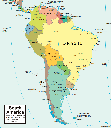

In [5]:

im = Image.open(dest)
im.to_thumb(128,128)

In [6]:

sat_img_types = 'north america', 'south america', 'central america'
#path = Path('satellite_images')

In [7]:
path=Path('/content/images/satellite_images')

In [8]:

if not path.exists():
    path.mkdir()
    for o in sat_img_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} satellite images america')
        download_images(dest, urls=results)

In [9]:
fns = get_image_files(path)
fns

(#575) [Path('/content/images/satellite_images/south america/1e25abcf-6e47-4d34-9231-145d8ec5326e.jpg'),Path('/content/images/satellite_images/south america/ec845f92-7f6c-4fe3-9405-48ac375717fb.jpg'),Path('/content/images/satellite_images/south america/9bef7b2c-99e3-42b0-9b0a-c718361d1923.jpg'),Path('/content/images/satellite_images/south america/1fcb9c14-5fd5-43fe-9c6d-240e8e608345.jpg'),Path('/content/images/satellite_images/south america/414d141d-0f04-4187-9bc3-7a63e81d7ac5.jpg'),Path('/content/images/satellite_images/south america/ec7425f0-8648-4f8b-ad4d-0f4f20522f1b.jpg'),Path('/content/images/satellite_images/south america/06d66ca3-e895-486c-8332-058f1e2ef46c.gif'),Path('/content/images/satellite_images/south america/7f37e859-7991-4588-a24e-44128a39325a.jpg'),Path('/content/images/satellite_images/south america/ad88f12b-2073-4d74-8657-173233cc410a.jpg'),Path('/content/images/satellite_images/south america/b3e93cf3-6b68-44d7-9ae9-3a6484ce6a9c.png')...]

In [10]:

failed = verify_images(fns)
failed

(#4) [Path('/content/images/satellite_images/north america/3b678edb-f991-4d7c-ac0b-50cda3c2ac1d.gif'),Path('/content/images/satellite_images/central america/273c1a4f-54a7-4831-8a26-ed9445c04851.jpg'),Path('/content/images/satellite_images/central america/99ab6acf-08ab-4fdf-b970-b7595d1508e6.jpg'),Path('/content/images/satellite_images/central america/6251447d-abcf-4612-a3c7-826c95254393.gif')]

In [11]:
failed.map(Path.unlink);

In [12]:
sat_img_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = sat_img_types.dataloaders(path)

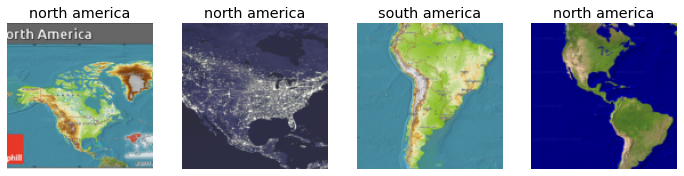

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

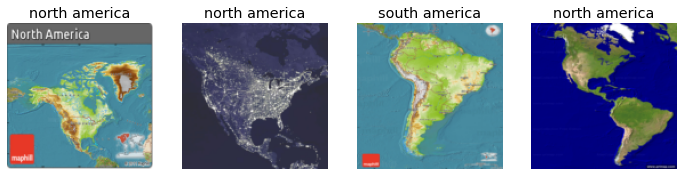

In [15]:

sat_img_types = sat_img_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = sat_img_types.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

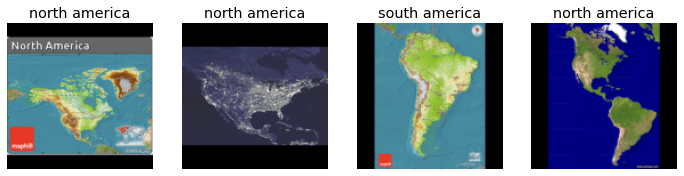

In [16]:

sat_img_types = sat_img_types.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = sat_img_types.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)
     

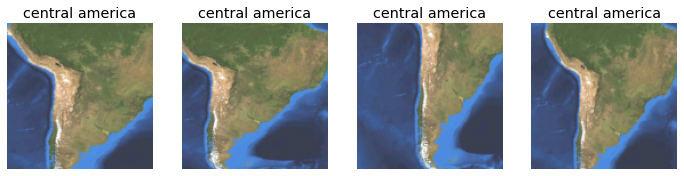

In [17]:

sat_img_types = sat_img_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = sat_img_types.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

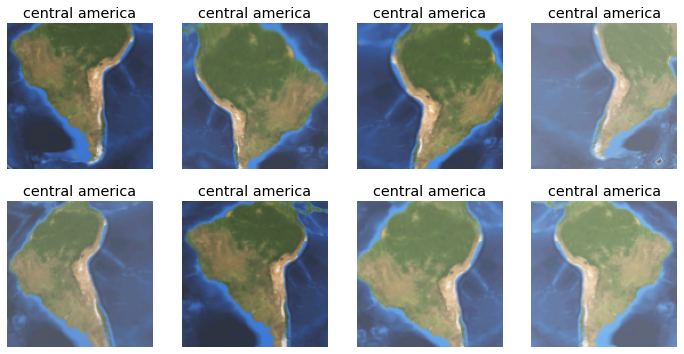

In [18]:
sat_img_types = sat_img_types.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = sat_img_types.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

###Train your model

In [19]:

sat_img_types = sat_img_types.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = sat_img_types.dataloaders(path)

In [20]:

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.974892,1.567671,0.596491,01:46


epoch,train_loss,valid_loss,error_rate,time
0,1.491090,1.254267,0.473684,02:22
1,1.451831,1.231194,0.473684,02:32
2,1.354241,1.352447,0.447368,02:29
3,1.270662,1.358400,0.473684,02:29


In [21]:
learn.export(path/'model_0.pkl')

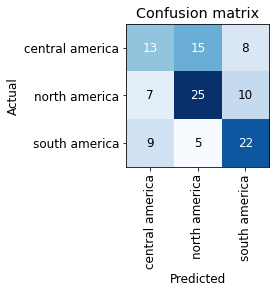

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

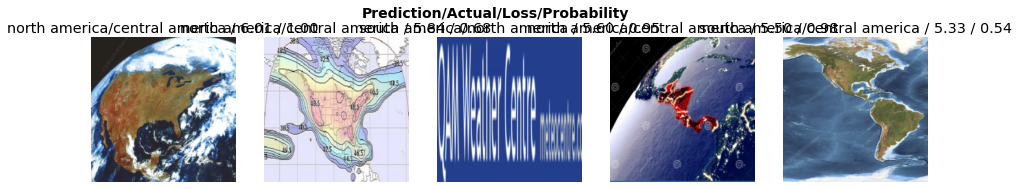

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

###Turn your model into an online App

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('/content/images/satellite images south america.jpg')

('north america', TensorBase(1), TensorBase([0.1516, 0.6117, 0.2366]))

In [30]:
learn_inf.dls.vocab

['central america', 'north america', 'south america']

### App

In [ ]:
from fastai.vision.all import *
import gradio as gr

def continent(x): return x[0].isupper()

In [ ]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=continent,
    item_tfms=Resize(192))

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

In [ ]:
learn.export('model.pkl')